In [1]:
using Test
using StaticArrays
using Random
using Plots
import Pkg
using Statistics

Pkg.activate(joinpath(@__DIR__, "../../"))
using segc_wl   # or the module name inside segc_wl.jl


  Activating project at `~/Documents/montecarlo/segc_wl`


In [ ]:
# function E_12_frac_LJ(rij_squared_σ::Float64,λ::Int64,λ_max::Int64,ϵ_ξ::Float64,σ_ξ_squared::Float64)::Float64 #  ✅ 
#     #= computes interaction between fractional particle and normal LJ particle according to equation 16 of Desgranges 2016. Note that `M` in Desgranges = λ_max + 1 in our notation
#     returns energy in lennard jones units
#     # takes in ϵ_ξ and σ_ξ_squared instead of precomputing because they only need to be computed 1 time every time λ changes
#     # assumes that rij_squared_σ was computed using the correct minimum image PBC 
#     E_int = (σ_ξ_squared/rij_squared_σ)^6 - (σ_ξ_squared/rij_squared_σ)^3
#     E_int = 4*ϵ_ξ*E_int
#     return(E_int)
# end #E12_frac_lj 

function E12_frac_LJ_simple(rij_squared_σ,λ,λ_max)
    #= computes interaction between fractional particle and normal LJ particle according to equation 16 of Desgranges 2016. Note that `M` in Desgranges = λ_max + 1 in our notation
    returns energy in lennard jones units
    =# 
    rij_σ = sqrt(rij_squared_σ) # sqrt is unavoidable here I think 
    M = λ_max + 1
    ϵ_ξ = (λ/M)^(1/3) # fractional energy  coupling parameter in lennard jones units (so really this might be named ϵ_ξ_σ but that just looked like too much)
    σ_ξ = (λ/M)^(1/4) # \sigma_\xi is the fractional distance coupling parameter in LJ σ units  
    E_int = (σ_ξ/rij_σ)^12 - (σ_ξ/rij_σ)^6
    E_int = 4*ϵ_ξ*E_int
    return(E_int)

end #E12_frac_lj 

E12_frac_LJ_simple (generic function with 1 method)

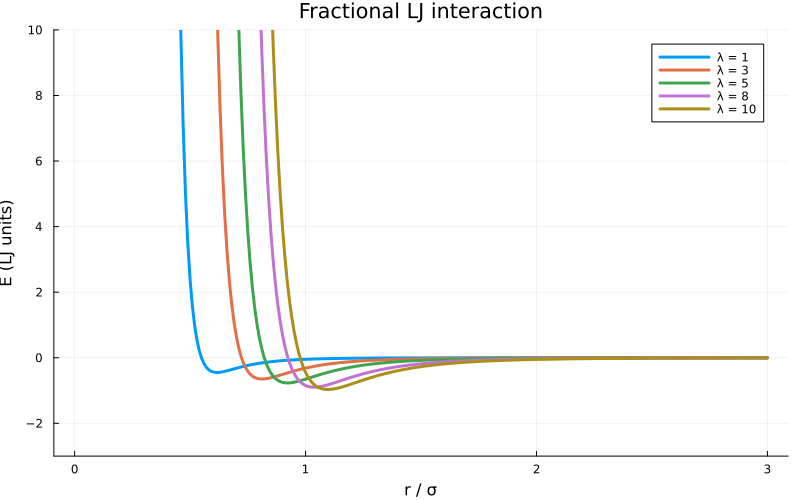

In [25]:
rs = 0:0.01:3
r2s = rs.^2

λ_max = 10
λ_values = [1, 3, 5, 8, 10]

p = plot(
    xlabel = "r / σ",
    ylabel = "E (LJ units)",
    title = "Fractional LJ interaction",
    legend = :topright,
    ylim=(-3,10),
    size = (800, 500)
)

for λ in λ_values
    E = E12_frac_LJ_simple.(r2s, λ, λ_max)
    plot!(p, rs, E, label = "λ = $λ",lw=3)
end

display(p)


# interesting that small λ is more steeply repulsive but allows you to get closer before repulsion starts

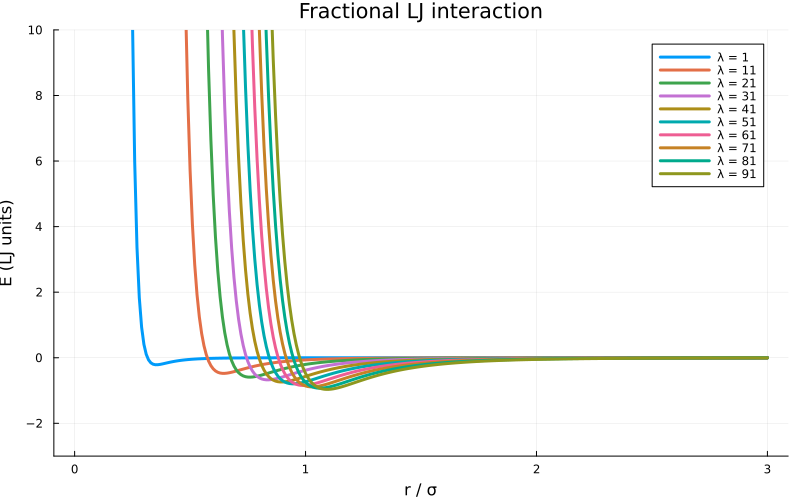

In [26]:
rs = 0:0.01:3
r2s = rs.^2

λ_max = 100
λ_values = 1:10:100

p = plot(
    xlabel = "r / σ",
    ylabel = "E (LJ units)",
    title = "Fractional LJ interaction",
    legend = :topright,
    ylim=(-3,10),
    size = (800, 500)
)

for λ in λ_values
    E = E12_frac_LJ_simple.(r2s, λ, λ_max)
    plot!(p, rs, E, label = "λ = $λ",lw=3)
end

display(p)

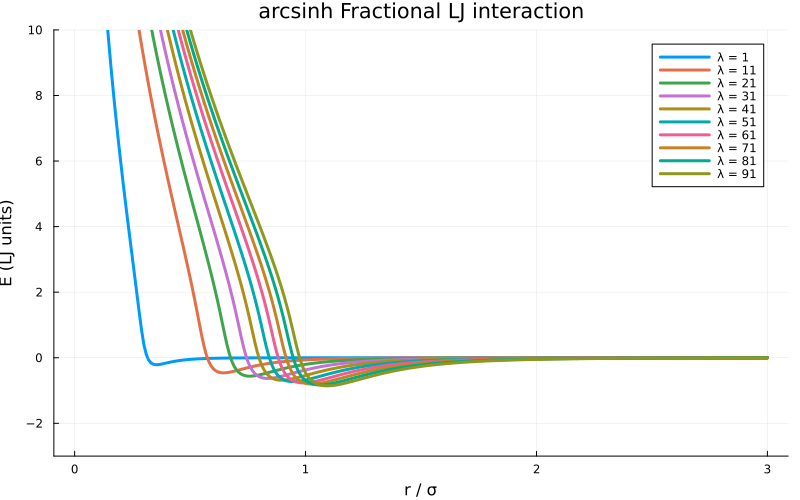

In [29]:
rs = 0:0.01:3
r2s = rs.^2

λ_max = 100
λ_values = 1:10:100

p = plot(
    xlabel = "r / σ",
    ylabel = "E (LJ units)",
    title = "arcsinh Fractional LJ interaction",
    legend = :topright,
    ylim=(-3,10),
    size = (800, 500)
)

for λ in λ_values
    E = asinh.(E12_frac_LJ_simple.(r2s, λ, λ_max))
    plot!(p, rs, E, label = "λ = $λ",lw=3)
end

display(p)